In [1]:
from AgentBasedModel import *
from AgentBasedModel.science import *
import AgentBasedModel.utils.math as math

import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Zero Run

In [2]:
data0 = list()

for _ in tqdm(range(50)):
    matrix0 = TransitionMatrix()
    matrix0_shock = TransitionMatrix()

    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix0.update(general_states(info, **params))
        except:
            pass


    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix0_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix0_shock)
    data0.append({
        'distance': distance
    })

data0 = pd.DataFrame(data0)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [41:09<00:00, 49.38s/it]


In [51]:
tmp = data0

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 0.544
std: 0.104
ci95: [0.514 ; 0.573]


In [4]:
matrix0 = TransitionMatrix()
matrix0_shock = TransitionMatrix()

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix0.update(general_states(info, **params))
    except:
        pass


for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix0_shock.update(general_states(info, **params))
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:00<00:00,  1.66it/s]


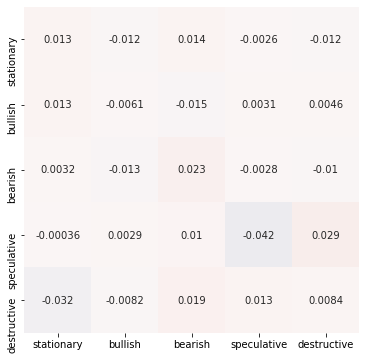

In [5]:
heatmap_distance(matrix0, matrix0_shock)

### Fundamental Price Shock

In [6]:
data1 = list()

for _ in tqdm(range(50)):
    matrix1_shock = TransitionMatrix()
    shock_value = random.randint(-40, 40)

    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
                'events': [FundamentalPriceShock(100, shock_value), MarketMakerIn(0)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix1_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix1_shock)
    data1.append({
        'fundamental value change': shock_value,
        'distance': distance
    })

data1 = pd.DataFrame(data1)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [22:13<00:00, 26.68s/it]


<AxesSubplot:xlabel='fundamental value change', ylabel='distance'>

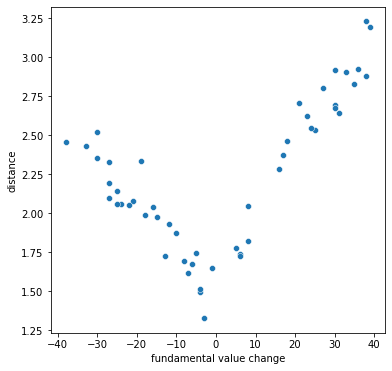

In [59]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data1, x='fundamental value change', y='distance')
# sns.lineplot(data=data1, x='fundamental value change', y='distance')

In [8]:
matrix1 = TransitionMatrix()
matrix1_shock = TransitionMatrix()
shock_value = -20

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
            'events': [FundamentalPriceShock(100, shock_value), MarketMakerIn(0)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix1_shock.update(general_states(info, **params))
    except:
        pass

distance = matrix0.distance(matrix1_shock)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.83it/s]


In [34]:
tmp = data1

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 2.234
std: 0.473
ci95: [2.101 ; 2.368]


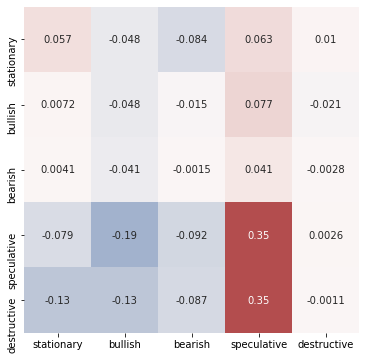

In [60]:
heatmap_distance(matrix0, matrix1_shock)

### Market Price Shock

In [36]:
data2 = list()

for _ in tqdm(range(50)):
    matrix2_shock = TransitionMatrix()
    shock_value = random.randint(-3000, 3000)
    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
                'events': [MarketPriceShock(100, shock_value), MarketMakerIn(0)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 1
            }
            matrix2_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix2_shock)
    data2.append({
        'market volume change': shock_value,
        'distance': distance
    })

data2 = pd.DataFrame(data2)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [17:22<00:00, 20.85s/it]


<AxesSubplot:xlabel='market volume change', ylabel='distance'>

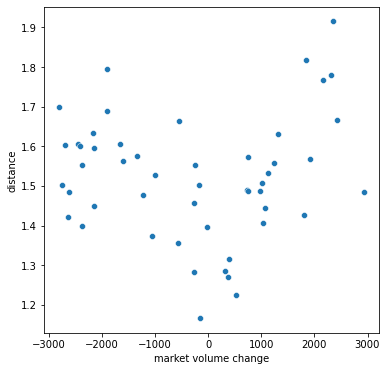

In [62]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data2, x='market volume change', y='distance')
# sns.lineplot(data=data2, x='market volume change', y='distance')

In [38]:
matrix2 = TransitionMatrix()
matrix2_shock = TransitionMatrix()
shock_value = 2000

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
            'events': [MarketPriceShock(100, shock_value), MarketMakerIn(0)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix2_shock.update(general_states(info, **params))
    except:
        pass

distance = matrix0.distance(matrix2_shock)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.40it/s]


In [39]:
tmp = data2

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 1.523
std: 0.155
ci95: [1.479 ; 1.567]


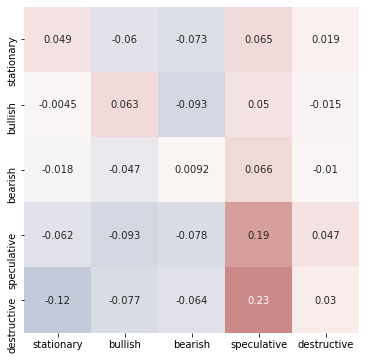

In [40]:
heatmap_distance(matrix0, matrix2_shock)

### Information Shock

In [41]:
data3 = list()

for _ in tqdm(range(50)):
    matrix3_shock = TransitionMatrix()
    shock_value = random.randint(1, 30)

    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=20) for _ in range(20)],
                'events': [InformationShock(100, shock_value), MarketMakerIn(0)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix3_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix3_shock)
    data3.append({
        'new access level': shock_value,
        'distance': distance
    })

data3 = pd.DataFrame(data3)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [19:07<00:00, 22.96s/it]


<AxesSubplot:xlabel='new access level', ylabel='distance'>

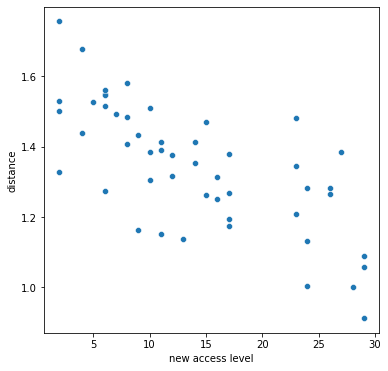

In [63]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data3, x='new access level', y='distance')
# sns.lineplot(data=data3, x='new access level', y='distance')

In [43]:
matrix3_shock = TransitionMatrix()
shock_value = 1

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
            'events': [InformationShock(100, shock_value), MarketMakerIn(0)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix3_shock.update(general_states(info, **params))
    except:
        pass

distance = matrix0.distance(matrix3_shock)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]


In [44]:
tmp = data3

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 1.346
std: 0.179
ci95: [1.295 ; 1.397]


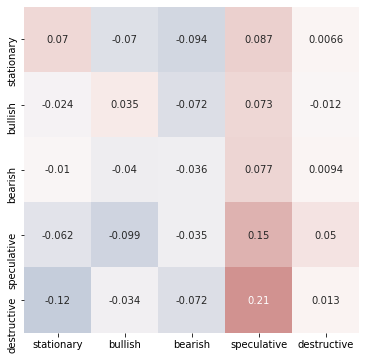

In [46]:
heatmap_distance(matrix0, matrix3_shock)

### Transaction cost

### 3%

In [47]:
data4 = list()

for _ in tqdm(range(50)):
    matrix4_shock = TransitionMatrix()
    shock_value = random.random() * .2

    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=1) for _ in range(20)],
                'events': [TransactionCost(100, shock_value)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix4_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix4_shock)
    data4.append({
        'transaction cost': shock_value,
        'distance': distance
    })

data4 = pd.DataFrame(data4)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [20:29<00:00, 24.58s/it]


<AxesSubplot:xlabel='transaction cost', ylabel='distance'>

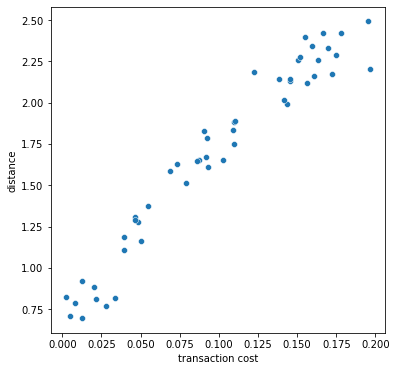

In [65]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data4, x='transaction cost', y='distance')
# sns.lineplot(data=data4, x='transaction cost', y='distance')

In [49]:
matrix4 = TransitionMatrix()
matrix4_shock = TransitionMatrix()
shock_value = .03

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
            'events': [TransactionCost(100, shock_value)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix4_shock.update(general_states(info, **params))
    except:
        pass

distance = matrix0.distance(matrix4_shock)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.14it/s]


In [50]:
tmp = data4

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 1.692
std: 0.555
ci95: [1.535 ; 1.849]


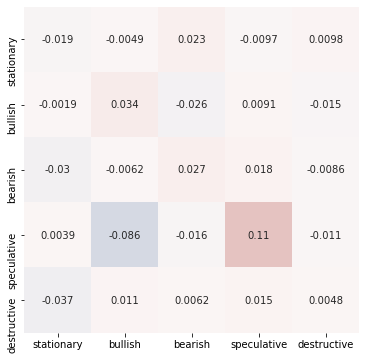

In [53]:
heatmap_distance(matrix0, matrix4_shock)

### 1%

In [47]:
data5 = list()

for _ in tqdm(range(50)):
    matrix4_shock = TransitionMatrix()
    shock_value = random.random() * .2

    for _ in range(50):
        try:
            exchange = ExchangeAgent(volume=1000)
            simulator = Simulator(**{
                'exchange': exchange,
                'traders': [Universalist(exchange, 10**3, access=1) for _ in range(20)],
                'events': [TransactionCost(100, shock_value)]
            })
            info = simulator.info
            simulator.simulate(500, silent=True)

            params = {
                'size': 10,
                'window': 5,
                'access': 10
            }
            matrix4_shock.update(general_states(info, **params))
        except:
            pass

    distance = matrix0.distance(matrix4_shock)
    data4.append({
        'transaction cost': shock_value,
        'distance': distance
    })

data4 = pd.DataFrame(data4)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [20:29<00:00, 24.58s/it]


<AxesSubplot:xlabel='transaction cost', ylabel='distance'>

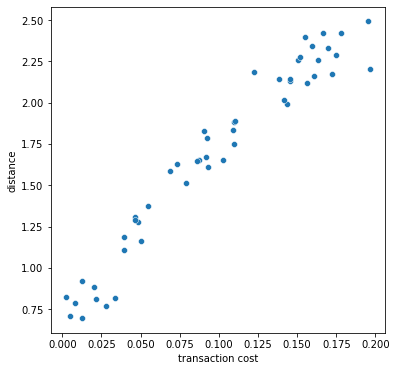

In [66]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data4, x='transaction cost', y='distance')
# sns.lineplot(data=data4, x='transaction cost', y='distance')

In [67]:
tmp = data4

l = tmp["distance"].mean() - 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5
r = tmp["distance"].mean() + 2 * tmp["distance"].std()/tmp["distance"].shape[0]**.5

print('mean: %.3f' % tmp["distance"].mean())
print('std: %.3f' % tmp["distance"].std())
print('ci95:', '[%.3f ; %.3f]' % (l, r))

mean: 1.692
std: 0.555
ci95: [1.535 ; 1.849]


In [57]:
matrix5_shock = TransitionMatrix()
shock_value = .015

for _ in tqdm(range(100)):
    try:
        exchange = ExchangeAgent(volume=1000)
        simulator = Simulator(**{
            'exchange': exchange,
            'traders': [Universalist(exchange, 10**3, access=10) for _ in range(20)],
            'events': [TransactionCost(100, shock_value)]
        })
        info = simulator.info
        simulator.simulate(500, silent=True)

        params = {
            'size': 10,
            'window': 5,
            'access': 10
        }
        matrix5_shock.update(general_states(info, **params))
    except:
        pass

distance = matrix0.distance(matrix5_shock)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.34it/s]


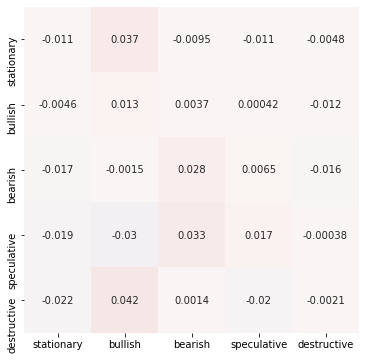

In [58]:
heatmap_distance(matrix0, matrix5_shock)